In [120]:
# importer les modules
%matplotlib inline
import csv, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import scipy.stats


from scipy.cluster.vq import kmeans, vq
from statsmodels.sandbox.tools.tools_pca import pcasvd


In [121]:
# Lecture des fichiers texte en CSV
# ouvrir et lire le fichier concerne
fichier ="liste2.csv"
fichier_lire=open(fichier,"r")
csv = pd.read_csv(fichier_lire,delimiter=",")
#fichier_csv = csv.reader(fichier_lire,delimiter=",")
#tab=list(csv) 

mvector=np.asarray(csv)
M=mvector[1:,:]



In [122]:
#fichier_lire=open(fichier,"r")
#csv = pd.read_csv(fichier_lire,delimiter=",")
x_mean=csv.mean()

mean=np.asarray(x_mean)
#print(mean)
cov=np.cov(M.astype(np.float),rowvar=0)
cov_std=cov-mean/np.std(cov)
#print(cov)
#print(mvector[1:,:].shape)
print(M.shape)

(294, 10)


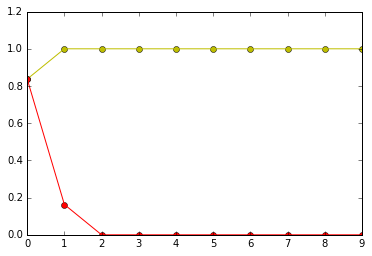

In [123]:
pca_full=PCA()
pca_full.fit_transform(cov_std)
ratio=pca_full.explained_variance_ratio_


#Variane expliquée cumulée
cumulative=np.cumsum(ratio)
plt.plot(cumulative,'yo')
plt.plot(cumulative,'y')
plt.plot(ratio,'ro')
plt.plot(ratio,'r')
plt.show()


In [125]:
#eig_attr=np.linalg.eigvals(cov)
#V=W.dot(M.transpose())
pca_final =PCA(n_components=2)
loadings=pca_final.fit_transform(cov)


P=pca_final.components_.transpose()
Pt=P.transpose()
C=P.dot(Pt) #matrice 12x12
#C=loadings.dot(loadings.transpose())
Ctild=np.eye(10,10)-C
Y_mod=C.dot(M.transpose())
Y_res=Ctild.dot(M.transpose())
print(Y_mod.shape)

np.linalg.norm(pca_final.components_.transpose()[0])
#les vecteurs y_mod sont en colonne de Y_mod
print(Y_res[:,0].shape)
#print(Y_res[:,0])
#for i in range(len(Y_res[0])):
#    print(np.linalg.norm(Y_res[:,i])**2,i)
        
#print(loadings.transpose().dot(M[0,:]))



(10, 294)
(10,)


In [126]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
 
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
    plt.show()

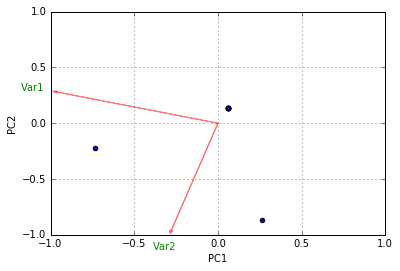

In [127]:
biplot(loadings,pca_final.components_,1,2)

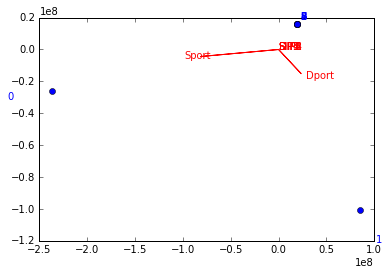

In [128]:

loads=pca_final.fit_transform(cov)
xvector = pca_final.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca_final.components_[1]

xs = loadings[:,0] # see 'prcomp(my_data)$x' in R
ys = loadings[:,1]



## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
            list(csv.columns.values)[i], color='r')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(csv.index)[i], color='b')

plt.show()

In [129]:
r=2 #Le nombre de composantes principales à garder 
phi1=sum(ratio[r:12])
phi2=sum(ratio[r:12]**2)
phi3=sum(ratio[r:12]**3)
h0=1-2*(phi1*phi3/(3*phi2**2))

#Calcul de c_alpha

alpha=0.1# Niveau de confiance 
normal=scipy.stats.norm(0,1) # Loi normale standard 
c_alpha=normal.ppf(1-alpha)

delta_alpha=phi1*(c_alpha*math.sqrt(2*phi2*h0**2)/phi1 + 1 + (phi2*h0*(h0-1))/phi1**2)**(1/2*h0)
print(delta_alpha)


3.66473632879e-14


In [130]:
mat_norm=[]
mat_anom=[]
for i in range(len(Y_res[0])):
    if (np.linalg.norm(Y_res[:,i])**2 <= delta_alpha**2):
        mat_norm.append(Y_res[:,i])
    else:
        mat_anom.append(Y_res[:,i])



In [131]:
print(mat_norm)

[]


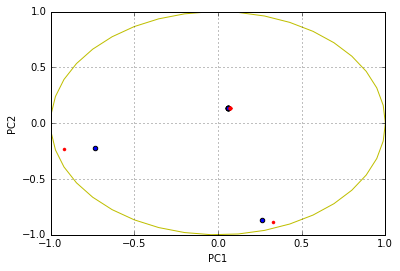

In [132]:
unit1=loadings[:,0]/np.linalg.norm(loadings[:,0])
unit2=loadings[:,1]/np.linalg.norm(loadings[:,1])

#U=np.array([unit1,unit2]).transpose()


scalex = 1.0/(xs.max()- xs.min())
scaley = 1.0/(ys.max()- ys.min())
plt.scatter(xs*scalex,ys*scaley)
for i in range (len(unit1)):
    plt.plot(unit1[i],unit2[i], 'r.')
theta=np.linspace(0,2*np.pi,40)    
x=np.cos(theta)
y=np.sin(theta)
plt.plot(x,y,'y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

In [133]:
for i in range(len(Y_res[0])):
    if((np.linalg.norm(Y_res[:,i])**2,i)>(np.linalg.norm(Y_mod[:,i])**2,i)):
        print(i)